<a href="https://colab.research.google.com/github/DurgamEashwar/Machine-Learning-project/blob/main/Task1_Iris_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Task-1: Build a classification model using the Iris dataset. Use decision tree or logistic regression to predict the flower species.

In [ ]:
# Import Libraries
# Import pandas for data handling
import pandas as pd

# Import numpy for numerical operations (optional here)
import numpy as np

# For splitting data into training and testing sets
from sklearn.model_selection import train_test_split

# For converting text labels into numeric
from sklearn.preprocessing import LabelEncoder

# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression

# For evaluation metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# For plotting (optional but useful)
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Load the dataset

# Load the Excel file (make sure it's in the same directory)
df = pd.read_excel("IRIS.csv.xlsx")

# Display the first 5 rows to understand structure
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [ ]:
# (categorical) to numeric values using LabelEncoder
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])

# Print first 5 rows after encoding
print(df.head())

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64
   sepal_length  sepal_width  petal_length  petal_width  species
0           5.1          3.5           1.4          0.2        0
1           4.9          3.0           1.4          0.2        0
2           4.7          3.2           1.3          0.2        0
3           4.6          3.1           1.5          0.2        0
4           5.0          3.6           1.4          0.2        0


In [ ]:
#Split the Dataset into Train and Test Sets

# Separate features (X) and labels (y)
X = df.drop('species', axis=1)  # Features
y = df['species']               # Target column

# Split dataset into training and testing (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Show shape of train and test data
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (120, 4)
Test shape: (30, 4)


In [ ]:
 #Step 5: Train Decision Tree Classifier and Evaluate

# Import the model
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree Classifier
dt_model = DecisionTreeClassifier()

# Train the model using training data
dt_model.fit(X_train, y_train)

# Use the trained model to predict on the test data
y_pred_dt = dt_model.predict(X_test)

# Calculate accuracy and convert it to percentage
dt_accuracy = accuracy_score(y_test, y_pred_dt) * 100

# Print accuracy in percentage format with 2 decimal places
print(f"Decision Tree Accuracy: {dt_accuracy:.2f}%")

# Display precision, recall, f1-score, and support for each class
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

# Show confusion matrix for detailed prediction results
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

Decision Tree Accuracy: 100.00%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [ ]:
#Step 6: Train Logistic Regression and Evaluate

# Import the model
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression model
# max_iter is set to 200 to ensure convergence
lr_model = LogisticRegression(max_iter=200)

# Train the model using training data
lr_model.fit(X_train, y_train)

# Predict the labels on test data
y_pred_lr = lr_model.predict(X_test)

# Calculate accuracy and convert it to percentage
lr_accuracy = accuracy_score(y_test, y_pred_lr) * 100

# Print accuracy in percentage format with 2 decimal places
print(f"Logistic Regression Accuracy: {lr_accuracy:.2f}%")

# Show precision, recall, f1-score
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

# Display confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

Logistic Regression Accuracy: 100.00%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


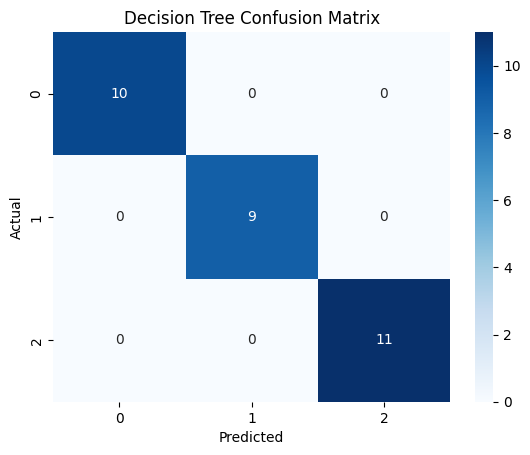

In [ ]:
# Plot confusion matrix for Decision Tree
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, cmap='Blues', fmt='d')
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
#Preprocessed the dataset
#Trained two models
#Evaluated both with accuracy and classification report
#Visualized results

In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#  Step 1: Change the random_state in train_test_split (e.g., 13)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=13)

#  Step 2: Add small random noise to training features
X_train_noisy = X_train + np.random.normal(0, 0.2, X_train.shape)

#  Step 3: Limit decision tree complexity (reduce overfitting)
dt_model = DecisionTreeClassifier(max_depth=2)

# Train the model using noisy training data
dt_model.fit(X_train_noisy, y_train)

# Predict on original (clean) test data
y_pred_dt = dt_model.predict(X_test)

# Calculate accuracy in percentage
dt_accuracy = accuracy_score(y_test, y_pred_dt) * 100
print(f"Decision Tree Accuracy: {dt_accuracy:.2f}%")

# Print detailed metrics
print("Classification Report:\n", classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))


Decision Tree Accuracy: 90.00%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.73      1.00      0.84         8
           2       1.00      0.77      0.87        13

    accuracy                           0.90        30
   macro avg       0.91      0.92      0.90        30
weighted avg       0.93      0.90      0.90        30

Confusion Matrix:
 [[ 9  0  0]
 [ 0  8  0]
 [ 0  3 10]]
